<a href="https://colab.research.google.com/github/rahul-t-p/RSNA-Intracranial-Hemorrhage-Detection/blob/master/RSNA_Intracranial_Hemorrhage_Detection_Nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle initial setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
#  from google.colab import files
#  files.upload()

In [4]:
 !pip install -U kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
cd /content/

/content


In [8]:
!kaggle datasets download -d taindow/rsna-train-stage-1-images-png-224x
!kaggle datasets download -d taindow/rsna-test-stage-1-images-png-224x

100% 12.9G/12.9G [02:16<00:00, 112MB/s]
100% 12.9G/12.9G [02:16<00:00, 102MB/s]
 99% 1.57G/1.58G [00:17<00:00, 84.4MB/s]
100% 1.58G/1.58G [00:17<00:00, 97.8MB/s]


In [0]:
%%capture
!unzip rsna-train-stage-1-images-png-224x.zip
!unzip rsna-test-stage-1-images-png-224x.zip

In [10]:
!kaggle competitions download rsna-intracranial-hemorrhage-detection -f stage_1_train.csv 
!kaggle competitions download rsna-intracranial-hemorrhage-detection -f stage_1_sample_submission.csv

 62% 9.00M/14.5M [00:00<00:00, 31.5MB/s]
100% 14.5M/14.5M [00:00<00:00, 41.7MB/s]
  0% 0.00/1.71M [00:00<?, ?B/s]
100% 1.71M/1.71M [00:00<00:00, 57.5MB/s]


In [0]:
%%capture
!unzip stage_1_train.csv.zip
!unzip stage_1_sample_submission.csv.zip

# EDA

In [0]:
import cv2
import matplotlib.pyplot as plt
from squircle import to_circle, to_square
from squircle import methods
from skimage.morphology import disk
from skimage.filters import median

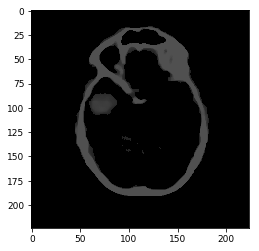

In [0]:
img = cv2.imread('stage_1_train_png_224x/ID_0002081b6.png')
@adapt_rgb(each_channel)
def median_each(image):
    return median(image,disk(3))
img = median_each(img)
img[img<35]=0
plt.imshow(img)

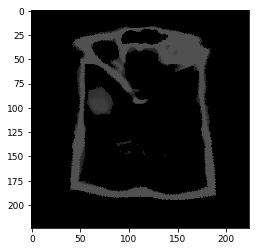

In [0]:
squ = to_square(img, method='stretch')
plt.imshow(squ)

In [0]:
from skimage.morphology import dilation
from skimage.morphology import disk,square

from skimage.color.adapt_rgb import adapt_rgb, each_channel

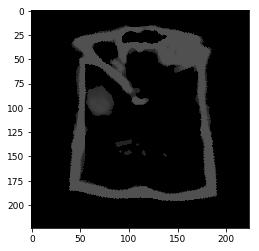

In [0]:
@adapt_rgb(each_channel)
def dilate_each(image):
    return dilation(image,disk(1))

dila = dilate_each(squ)
plt.imshow(dila)

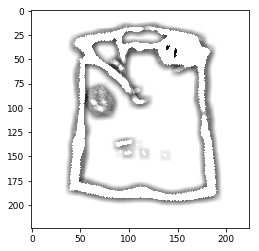

In [0]:
# Equalization
@adapt_rgb(each_channel)
def histloc(img):
    return rank.equalize(img, selem=square(10))

eql = histloc(dila)
plt.imshow(eql)

# Training and Validation

## Installing packages

In [12]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

Cloning into 'apex'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 5440 (delta 3), reused 6 (delta 3), pack-reused 5422
Receiving objects: 100% (5440/5440), 13.33 MiB | 25.94 MiB/s, done.
Resolving deltas: 100% (3514/3514), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:243: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-jcgyl4pr
Created temporary directory: /tmp/pip-req-tracker-w5y94jom
Created requirements tracker '/tmp/pip-req-tracker-w5y94jom'
Created temporary directory: /tmp/pip-install-24xvy6bh
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-1b73vapn
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-w5y94jom'
    Running setup.py (

In [13]:
!pip install -U lz4
!pip install -U efficientnet-pytorch
!pip install -U wandb
!pip install -U albumentations
!pip install -U squircle
# !pip install pretrainedmodels
# !pip install -U catalyst


     |████████████████████████████████| 399kB 2.8MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.4.0-cp36-none-any.whl size=11149 sha256=edceb2443241fb6319ec8d89fbe91b15a1d37359208e55210a9a2afde39f5332
  Stored in directory: /root/.cache/pip/wheels/27/56/13/5bdaa98ca8bd7d5da65cc741987dd14391b87fa1a09081d17a
Successfully built efficientnet-pytorch
     |████████████████████████████████| 1.3MB 2.8MB/s 
     |████████████████████████████████| 235kB 37.8MB/s 
     |████████████████████████████████| 460kB 37.6MB/s 
     |████████████████████████████████| 102kB 23.4MB/s 
     |████████████████████████████████| 92kB 30.3MB/s 
     |████████████████████████████████| 92kB 32.1MB/s 
     |████████████████████████████████| 256kB 39.9MB/s 
     |████████████████████████████████| 71kB 26.6MB/s 
     |████████████████████████████████| 184kB 41.6MB/s 
  Created wheel for gql: filename=gql-0.1.0-cp36-none-any.whl size=5541 sha256=542ef2f107e919f93b874e8bd053fd3ea1b6feb3

     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 634kB 8.8MB/s 
     |████████████████████████████████| 28.7MB 36.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.3.3-cp36-none-any.whl size=55380 sha256=99df1fda142ad59e75e3fe2aa7d07e755b35c97cecf0c0937d75b4e9ab0ac15b
  Stored in directory: /root/.cache/pip/wheels/ec/67/12/fe5e79caf7aa6bbdca1506fc66bfd61fc4eae5abb5397b9c08
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=e373dd9b671dc9d568e930aac1f2705686ae6ae068d1556b5d1666b786b09fdd
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3

In [0]:
import IPython

def configure_plotly_browser_state():
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

## Importing packages

In [0]:
from apex import amp

import os
import cv2
import glob

import numpy as np
import pandas as pd

from efficientnet_pytorch import EfficientNet

import torch
import torch.optim as optim
from torch.utils.data import Dataset
# from torchvision import transforms

from albumentations import *
from albumentations.pytorch import ToTensor

from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

from PIL import Image

In [0]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## Helper functions


In [0]:
transform_train = Compose([
    ShiftScaleRotate(),
    RandomBrightnessContrast(p=1),
    # RandomRGBShift(),
    # RandomBlur(),
    # RandomGaussNoise(),
    # transforms.RandomAffine(
    #     degrees=(-180, 180),
    #     scale=(0.8889, 1.0),
    #     shear=(-36, 36)),
    # transforms.ColorJitter(contrast=(0.9, 1.1)),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ToTensor()
])

transform_test= Compose([
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ToTensor()
])

In [0]:
from squircle import to_square
from squircle import methods
from skimage.morphology import disk, square, dilation
from skimage.filters import median, rank

from skimage.color.adapt_rgb import adapt_rgb, each_channel

# Median
@adapt_rgb(each_channel)
def median_each(image):
    return median(image,disk(3))
# Dilation
@adapt_rgb(each_channel)
def dilate_each(image):
    return dilation(image,disk(1))
# Equalization
@adapt_rgb(each_channel)
def histloc(image):
    return rank.equalize(image, selem=square(5))

def preprocess(img):
    img = median_each(img)
    img[img<35]=0
    img = to_square(img, method='stretch')
    img = dilate_each(img)
    img = histloc(img)
    return img


In [0]:
# img = cv2.imread('stage_1_train_png_224x/ID_0002081b6.png')
# img = preprocess(img)
# plt.imshow(img)
# %timeit preprocess(img)

## Data

In [0]:
dir_csv = '.'
dir_train_img = 'stage_1_train_png_224x'
dir_test_img = 'stage_1_test_png_224x'

In [0]:
n_classes = 6

In [0]:
train_df = pd.read_csv(os.path.join(dir_csv, 'stage_1_train.csv'))
test_df = pd.read_csv(os.path.join(dir_csv, 'stage_1_sample_submission.csv'))

In [9]:
# Split train out into row per image and save a sample

train_df[['ID', 'Image', 'Diagnosis']] = train_df['ID'].str.split('_', expand=True)
train_df = train_df[['Image', 'Diagnosis', 'Label']]
train_df.drop_duplicates(inplace=True)
train_df = train_df.pivot(index='Image', columns='Diagnosis', values='Label').reset_index()
train_df['Image'] = 'ID_' + train_df['Image']
train_df.head()

Diagnosis,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0,0,0,0,0,0,0
1,ID_00005679d,0,0,0,0,0,0
2,ID_00008ce3c,0,0,0,0,0,0
3,ID_0000950d7,0,0,0,0,0,0
4,ID_0000aee4b,0,0,0,0,0,0


In [10]:
train_df.head(25)

Diagnosis,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0,0,0,0,0,0,0
1,ID_00005679d,0,0,0,0,0,0
2,ID_00008ce3c,0,0,0,0,0,0
3,ID_0000950d7,0,0,0,0,0,0
4,ID_0000aee4b,0,0,0,0,0,0
5,ID_0000f1657,0,0,0,0,0,0
6,ID_000178e76,0,0,0,0,0,0
7,ID_00019828f,0,0,0,0,0,0
8,ID_0001dcc25,0,0,0,0,0,0
9,ID_0001de0e8,0,0,0,0,0,0


In [0]:
# Some files didn't contain legitimate images, so we need to remove them

png = glob.glob(os.path.join(dir_train_img, '*.png'))
png = [os.path.basename(png)[:-4] for png in png]
png = np.array(png)

train_df = train_df[train_df['Image'].isin(png)]
train_df.to_csv('train.csv', index=False)

In [0]:
# Also prepare the test data

test_df[['ID','Image','Diagnosis']] = test_df['ID'].str.split('_', expand=True)
test_df['Image'] = 'ID_' + test_df['Image']
test_df = test_df[['Image', 'Label']]
test_df.drop_duplicates(inplace=True)

test_df.to_csv('test.csv', index=False)

In [0]:

class IntracranialDataset(Dataset):

    def __init__(self, csv_file, path, labels, transform=None):
        
        self.path = path
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.labels = labels

    def __len__(self):
        
        return len(self.data)

    def __getitem__(self, idx):
        
        img_name = os.path.join(self.path, self.data.loc[idx, 'Image'] + '.png')
        img = cv2.imread(img_name)
        img = preprocess(img) 
        
        if self.transform:       
            
            augmented = self.transform(image=img)
            img = augmented['image']   
            
        if self.labels:
            
            labels = torch.tensor(
                self.data.loc[idx, ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']])
            return {'image': img, 'labels': labels}    
        
        else:      
            
            return {'image': img}

In [0]:
batch_size = 128

train_dataset = IntracranialDataset(
    csv_file='train.csv', path=dir_train_img, transform=transform_train, labels=True)

valid_dataset = IntracranialDataset(
    csv_file='train.csv', path=dir_train_img, transform=transform_test, labels=True)

test_dataset = IntracranialDataset(
    csv_file='test.csv', path=dir_test_img, transform=transform_test, labels=False)

torch.manual_seed(1)
indices = torch.randperm(len(train_dataset)).tolist()
train_dataset = torch.utils.data.Subset(train_dataset, indices[:-10000])
valid_dataset = torch.utils.data.Subset(valid_dataset, indices[-10000:])

data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

data_loader_valid = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

data_loader_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [15]:
len(train_dataset),len(test_dataset)

(661796, 78545)

## Model and Hyper parms

In [0]:
def get_model(n_classes):
    model = EfficientNet.from_pretrained('efficientnet-b0') 
    in_features = model._fc.in_features
    model._fc = torch.nn.Linear(in_features, n_classes)
    return model

In [17]:
model = get_model(n_classes)

model.to(device)

Downloading: "http://storage.googleapis.com/public-models/efficientnet/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 91.8MB/s]


Loaded pretrained weights for efficientnet-b0


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [0]:
criterion = torch.nn.BCEWithLogitsLoss()
plist = [{'params': model.parameters(), 'lr': 2e-5}]
optimizer = optim.Adam(plist, lr=2e-5)

In [19]:
model, optimizer = amp.initialize(model, optimizer, opt_level="O1")

Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


## Training

In [0]:
n_epochs = 8

In [0]:
logdir = "drive/Shared drives/Team/elggak/RSNA/"

In [0]:
training_losses = []
validation_losses = []
best_loss = 0.0730

In [0]:

for epoch in range(n_epochs):
    
    print('Epoch {}/{}'.format(epoch, n_epochs - 1))
    print('-' * 10)

    model.train()    
    tr_loss = 0
    
    tk0 = tqdm(data_loader_train, desc="Iteration")

    for step, batch in enumerate(tk0):

        optimizer.zero_grad()

        inputs = batch["image"]
        labels = batch["labels"]

        inputs = inputs.to(device, dtype=torch.float)
        labels = labels.to(device, dtype=torch.float)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        with amp.scale_loss(loss, optimizer) as scaled_loss:
            scaled_loss.backward()

        tr_loss += loss.item()

        optimizer.step()
        

    train_loss = tr_loss / len(data_loader_train)
    training_losses.append(train_loss)

    print('Train loss: {:.4f}'.format(train_loss))

    model.eval()
    with torch.no_grad():    
        vl_loss = 0
        
        tk0 = tqdm(data_loader_valid, desc="Iteration")

        for step, batch in enumerate(tk0):

            optimizer.zero_grad()

            inputs = batch["image"]
            labels = batch["labels"]

            inputs = inputs.to(device, dtype=torch.float)
            labels = labels.to(device, dtype=torch.float)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            vl_loss += loss.item()
        
        valid_loss = vl_loss / len(data_loader_valid)
        validation_losses.append(valid_loss)
        
        print('Valid loss: {:.4f}'.format(valid_loss))

    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'amp': amp.state_dict()
        }, str(logdir+"/checkpoint_preprocess.pth"))
        print('checkpoint updated')



Epoch 0/7
----------


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0


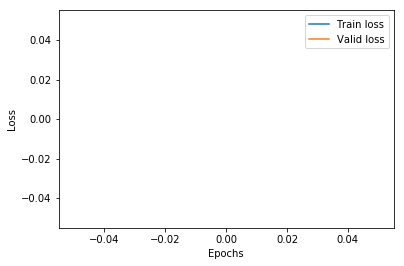

In [0]:
%matplotlib inline

plt.plot(training_losses, label='Train loss')
plt.plot(validation_losses, label='Valid loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

# Inference

In [0]:
torch.cuda.empty_cache()

In [0]:
checkpoint = torch.load(str(logdir+'/checkpoint.pth'))
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
# amp.load_state_dict(checkpoint['amp'])

# lr_scheduler.load_state_dict(checkpoint['scheduler'])

In [0]:
for param in model.parameters():
    param.requires_grad = False

model.eval()

test_pred = np.zeros((len(test_dataset) * n_classes, 1))

for i, x_batch in enumerate(tqdm(data_loader_test)):
    
    x_batch = x_batch["image"]
    x_batch = x_batch.to(device, dtype=torch.float)
    
    with torch.no_grad():
        
        pred = model(x_batch)
        
        test_pred[(i * batch_size * n_classes):((i + 1) * batch_size * n_classes)] = torch.sigmoid(
            pred).detach().cpu().reshape((len(x_batch) * n_classes, 1))


# Submission

In [0]:
submission =  pd.read_csv(os.path.join(dir_csv, 'stage_1_sample_submission.csv'))
submission = pd.concat([submission.drop(columns=['Label']), pd.DataFrame(test_pred)], axis=1)
submission.columns = ['ID', 'Label']

submission.to_csv('submission.csv', index=False)
submission.head()

In [0]:
!kaggle competitions submit -c humpback-whale-identification -f submission.csv -m "Message"